In [49]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

In [63]:
import matplotlib.colors as colors
from itertools import cycle
import random

colors = list(colors.cnames.keys())
colors.remove('black')  # zarezerwowany dla outlierów
random.shuffle(colors)

def plotClustering(X, plt_labels):
    plt_colors = cycle(colors)

    plt_K = np.unique(plt_labels).size

    for k in range(-1, plt_K):
        color = next(plt_colors) if k >= 0 else 'black'
        mask = (plt_labels == k)
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')

    plt.show()

    print('Silhouette coefficient mean')
    print(metrics.silhouette_score(X, plt_labels))

In [64]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

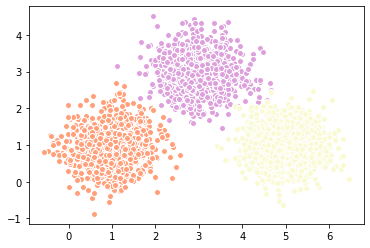

Silhouette coefficient mean
0.6756285992749302


In [65]:
plotClustering(X, labels)

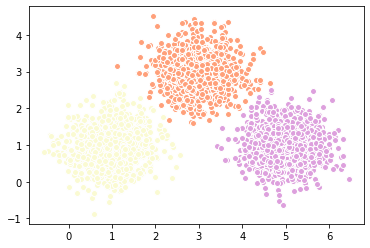

Silhouette coefficient mean
0.6764055612593313


In [66]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

plotClustering(X, k_means.labels_)

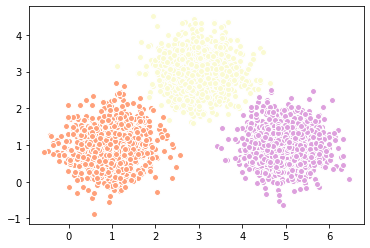

Silhouette coefficient mean
0.6764055612593313


In [67]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=100)
k_means.fit(X)

plotClustering(X, k_means.labels_)

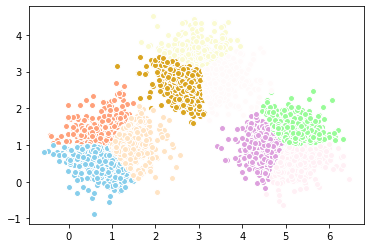

Silhouette coefficient mean
0.325484917779808


In [68]:
k_means = KMeans(init='k-means++', n_clusters=9, n_init=1)
k_means.fit(X)

plotClustering(X, k_means.labels_)

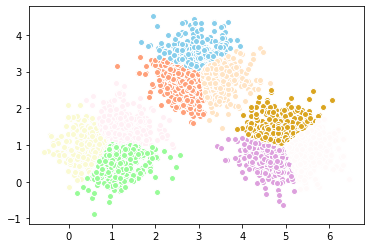

Silhouette coefficient mean
0.3351649177600068


In [69]:
k_means = KMeans(init='k-means++', n_clusters=9, n_init=100)
k_means.fit(X)

plotClustering(X, k_means.labels_)

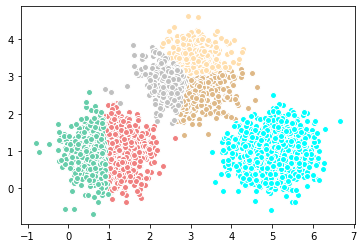

In [24]:
birch = Birch(threshold=0.75, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_)

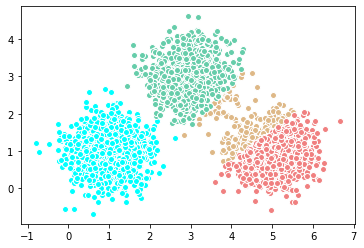

In [25]:
birch = Birch(threshold=1.5, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_)

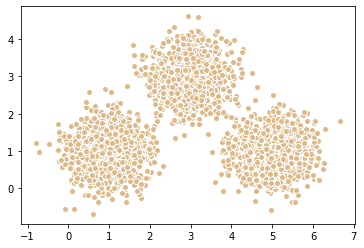

In [26]:
birch = Birch(threshold=3, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_)

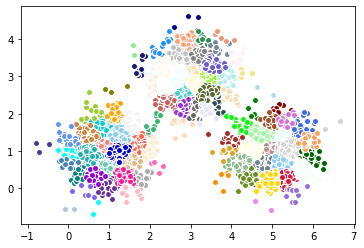

In [27]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_)

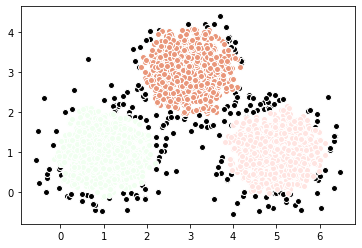

In [32]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

plotClustering(X, dbscan.labels_)

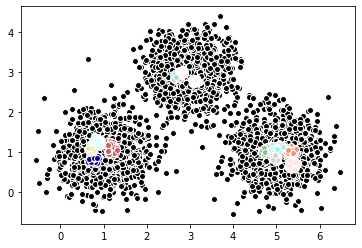

In [31]:
dbscan = DBSCAN(eps=0.1, min_samples=25)
dbscan.fit(X)

plotClustering(X, dbscan.labels_)

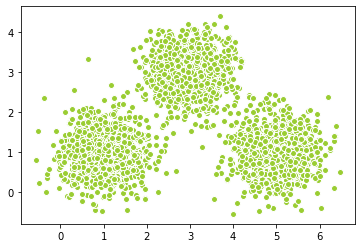

In [35]:
dbscan = DBSCAN(eps=1, min_samples=25)
dbscan.fit(X)

plotClustering(X, dbscan.labels_)

# Irysy

In [41]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

attr_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

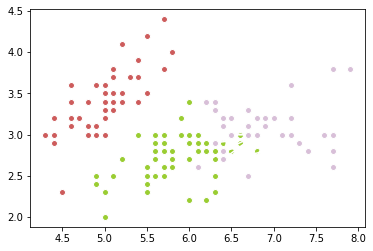

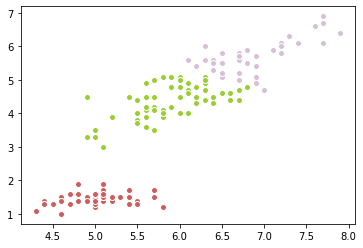

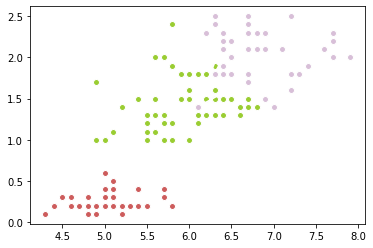

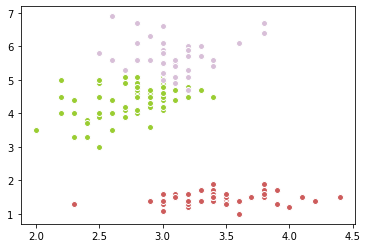

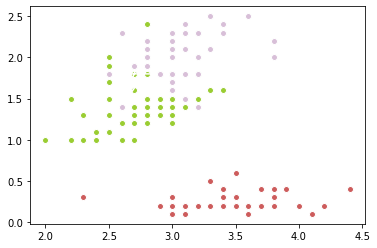

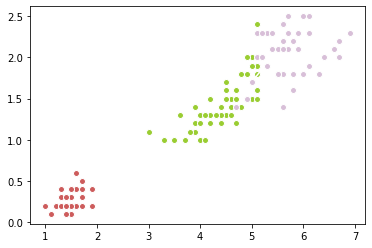

In [43]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

for attr1, attr2 in attr_pairs:
    plotClustering(X[:, (attr1, attr2)], k_means.labels_)

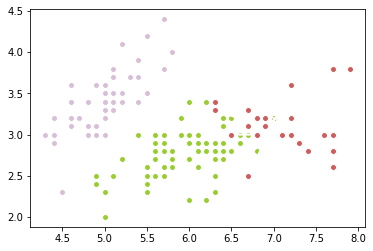

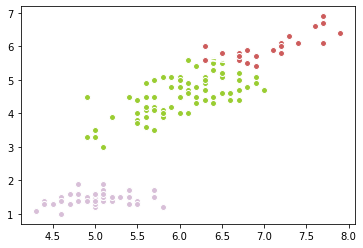

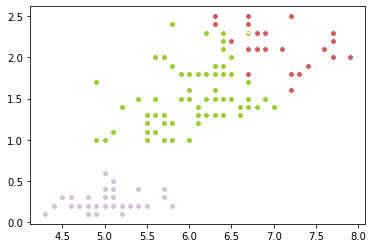

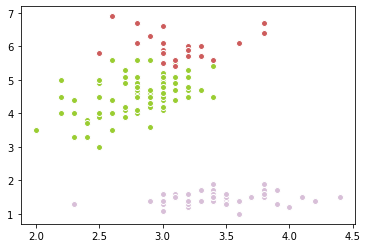

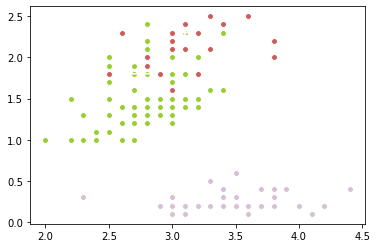

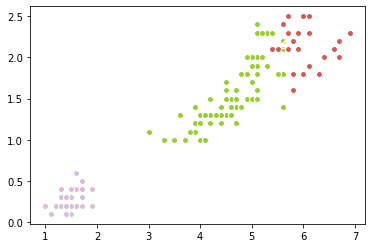

In [44]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

for attr1, attr2 in attr_pairs:
    plotClustering(X[:, (attr1, attr2)], birch.labels_)

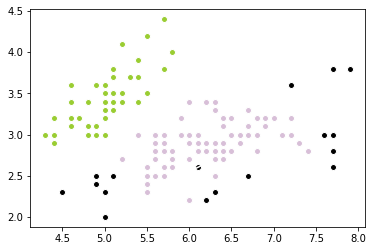

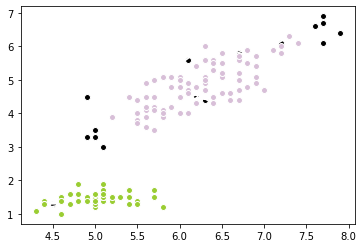

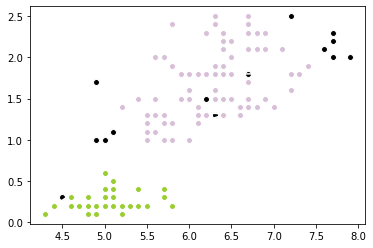

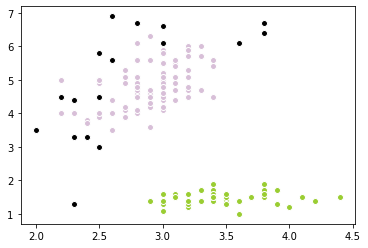

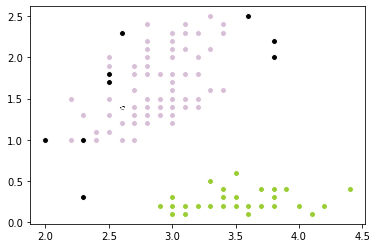

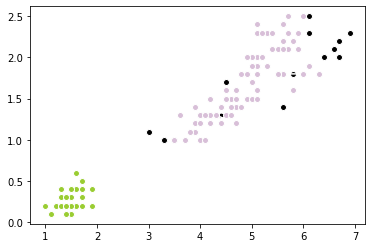

In [47]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

for attr1, attr2 in attr_pairs:
    plotClustering(X[:, (attr1, attr2)], dbscan.labels_)